# Numpy チュートリアル

実際にコードを実行しながら、頻繁に使う numpy の関数を覚えていきましょう。

## 配列の概念を理解する


### データの次元

ここでは、いろいろな次元のデータを作成して、表示してみます。

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import face as sampleimg
from scipy.misc import toimage, imresize
%matplotlib inline

In [2]:
# 1次元
array_1d = np.array([1, 2, 3, 4])
print(array_1d.ndim)  # .ndim で array の次元数を得る
print(array_1d)

1
[1 2 3 4]


In [3]:
# 2次元
array_2d = np.array([[1, 2, 3, 4], [5, 6, 7, 8]])
print(array_2d.ndim)
print(array_2d)

2
[[1 2 3 4]
 [5 6 7 8]]


In [4]:
# 3次元
array_3d = np.array([[[0, 1], [2, 3]], [[4, 5], [6, 7]]])
print(array_3d.ndim)
print(array_3d) # 8個のサイコロを立方体状に組み上げた状態だが、出力結果の意味は直感的には理解しづらくなってくる。
                # 0123 が1階部分、4567 が2階部分。

3
[[[0 1]
  [2 3]]

 [[4 5]
  [6 7]]]


#### 【問題】

カラーの画像は、3次元の配列データです。  
それぞれの次元は、何の情報を意味しているでしょうか？  
以下の出力結果を見て、考えてみましょう。  

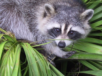

In [5]:
img = imresize(sampleimg(), 0.1)
toimage(img)

In [6]:
print("配列の形状:", img.shape)
print(img)

配列の形状: (76, 102, 3)
[[[122 118 137]
  [109 103 119]
  [105  96 112]
  ..., 
  [ 97 129  72]
  [129 146  95]
  [107 125  71]]

 [[121 116 135]
  [130 122 142]
  [129 121 141]
  ..., 
  [ 90 127  62]
  [ 90 121  62]
  [ 76 103  50]]

 [[151 145 165]
  [141 135 156]
  [145 141 162]
  ..., 
  [ 71  99  49]
  [ 65  90  50]
  [ 71  93  52]]

 ..., 
 [[106 135  76]
  [126 153  86]
  [122 161  75]
  ..., 
  [113 151 100]
  [113 151  99]
  [115 154 101]]

 [[116 138  85]
  [127 158  85]
  [115 158  70]
  ..., 
  [114 154 101]
  [110 151  98]
  [111 149 100]]

 [[115 136  86]
  [124 160  77]
  [107 152  64]
  ..., 
  [111 151  98]
  [111 154 100]
  [116 157 102]]]


### 行列の転置

`array.T` とすると、「転置」した配列データを得ることができます。  

In [7]:
array_2d.T

array([[1, 5],
       [2, 6],
       [3, 7],
       [4, 8]])

In [9]:
array_2d

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

画像データを転置してみましょう。  
プレビューは引き続き可能ですが、各次元が持つ意味が変わりました。  
どのように変わったのでしょうか？

In [ ]:
print(img.T.shape)
toimage(img.T)

In [ ]:
img.T

### 行列演算 vs ループ処理

numpy を使って処理をする理由の最たるものは、演算を高速に行うことです。  
numpy では、複数の要素・値に対する処理を一括でおこなえるという利点があります。  
データの数が小さければ、通常のPythonプログラミングで個別の値を処理しても大きな差にはなりませんが、  
量が多くなるほど、その差が大きくなります。

実際に、その差を観察してみましょう。

In [10]:
# 100x100 の2次元の配列・リストを作成します。
value_array = np.arange(10000).reshape((100, 100))
value_list = value_array.tolist()

作成した配列・リストの全ての値に123 を足し、その時間を計測してみます。

In [13]:
%%timeit 
# リストの場合
for row in value_list:
    for col in row:
        col + 123

1000 loops, best of 3: 446 µs per loop


In [14]:
# 配列の場合
%timeit value_array + 123

The slowest run took 22.31 times longer than the fastest. This could mean that an intermediate result is being cached.
100000 loops, best of 3: 4.84 µs per loop


## 配列を作成する

配列を作成するための関数は様々にありますが、初歩的かつ頻繁に使うものを、以下で取り上げます。

### 0 または 1 で埋められた配列

配列を最初に使う際は、できるだけ「きれいな値」で初期化しておきたいことがあります。  
統計や機械学習では、様々な値を 0 から 1 までの値（あるいは -1 から 1）へ「正規化」することがよくあります。  
この時、両極端となる 0 や 1 で埋められた値は、「きれいな値」と考えることができます。  

In [15]:
# 5x6 の配列を、1で埋める場合
ones = np.ones((5, 6))
ones

array([[ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.]])

In [16]:
zeros = np.zeros((3, 5))
zeros

array([[ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

既存の配列と同じ形状の 0 埋め・1埋め配列を作ることもできます。

In [17]:
ones_alt = np.ones_like(array_2d)  # np.zeros_like も使用可能
ones_alt

array([[1, 1, 1, 1],
       [1, 1, 1, 1]])

これは以下とほぼ同義です。

In [ ]:
np.ones(array_2d.shape, dtype=array_2d.dtype)  # 配列の構造、値の型を ones_like は揃えてくれている

#### 【問題】

では、-1 で埋められた任意の大きさの配列を作ってみてください。  
0 や 1 の値をどう使えば良いでしょうか？

In [ ]:
np.zeros(array_2d.shape, dtype=array_2d.dtype) - np.ones(array_2d.shape, dtype=array_2d.dtype)

### ランダムな値の生成

ダミーデータを用意する時など、ランダムな値を使用したくなることもあります。  
numpy ではランダム値生成の方法がいくつかありますが、代表的なものを取り上げます。

#### ランダムな整数値

ランダムな整数値を作ります。  
以下では、`low` 以上 `high` 未満 の値を `size` だけ生成します。

In [38]:
np.random.randint(low=0, high=10, size=5)

array([2, 6, 5, 4, 1])

単に数値だけを渡すと、0 以上 value 未満の値が抽出されるようになっています。

In [43]:
np.random.randint(20, size=5)

array([ 0, 10,  0, 13, 13])

#### ランダムな小数値

配列の形状を指定し、ランダムな小数値で構成される配列を作ります。  

In [56]:
np.random.rand(2, 5)

array([[ 0.04496138,  0.18586606,  0.18451097,  0.93793478,  0.5676924 ],
       [ 0.23398801,  0.91240897,  0.5333119 ,  0.18548394,  0.90892535]])

#### 既存の配列からランダムに N 個の値を抽出

In [63]:
some_array = np.arange(100)
np.random.choice(some_array, size=10) # ランダムに 10個抽出

array([74,  2, 21, 61, 92, 19, 44, 89, 67, 93])

#### ランダム値の固定

できるだけランダムな値を使いたい一方、分析などの際に「再現性」が求められる場合は、  
ランダムな値を発生させるための「種」を固定します。

In [64]:
np.random.seed(124)
np.random.rand(5)  # 何度実行しても同じ値になる

array([ 0.10606491,  0.74547148,  0.57231354,  0.45824118,  0.3847059 ])

#### 【問題】

0以上 100以下のランダムな小数値を作成してみてください。

In [65]:
np.random.rand(2, 5) * 100

array([[ 27.39893063,  66.79624094,  39.54750108,  28.1572894 ,
         77.99197054],
       [ 59.90941638,  12.29463579,  38.95740328,  97.49883583,
         46.75989007]])

### 連続する値の生成

ここまでの例でもさりげなく使っていましたが、連続する値を生成することができます。  
Python の標準関数である `range` と似ていますが、`np.arange` を使います。

In [66]:
np.arange(30)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [67]:
list(range(10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

start の値を指定することも可能です。

In [ ]:
np.arange(1000, 1030)

必要なら、一つ飛びの値にすることもできます。

In [ ]:
np.arange(100, step=2)

### 最大・最小値と内部のセグメント数を指定した値の生成

区間とその内部のセグメント数を指定し、等間隔に値を設定した配列を作ることができます。

例えば、グラフを点の集合で描くとしましょう。  
$y = ax^2 + bx + c$ のグラフをある $x$ の区間について描き出したい時、  
$y$ をサンプリングするための $x$ を作る際に利用できます。  

このケースでは、$x$ の数を増やすほど、グラフが正確になります。  
同等の配列を `np.arange` でも表現することはできますが、  
何を制御したいかという要求によって、`np.arange` と `np.linspace` の使い分けをおこないます。

In [68]:
def f(x):
    return 3 * (x **2) + 2 * x + 1 

In [69]:
np.linspace(0, 100, num=201)  # np.arange(0, 100.5, 0.5) と等価

array([   0. ,    0.5,    1. ,    1.5,    2. ,    2.5,    3. ,    3.5,
          4. ,    4.5,    5. ,    5.5,    6. ,    6.5,    7. ,    7.5,
          8. ,    8.5,    9. ,    9.5,   10. ,   10.5,   11. ,   11.5,
         12. ,   12.5,   13. ,   13.5,   14. ,   14.5,   15. ,   15.5,
         16. ,   16.5,   17. ,   17.5,   18. ,   18.5,   19. ,   19.5,
         20. ,   20.5,   21. ,   21.5,   22. ,   22.5,   23. ,   23.5,
         24. ,   24.5,   25. ,   25.5,   26. ,   26.5,   27. ,   27.5,
         28. ,   28.5,   29. ,   29.5,   30. ,   30.5,   31. ,   31.5,
         32. ,   32.5,   33. ,   33.5,   34. ,   34.5,   35. ,   35.5,
         36. ,   36.5,   37. ,   37.5,   38. ,   38.5,   39. ,   39.5,
         40. ,   40.5,   41. ,   41.5,   42. ,   42.5,   43. ,   43.5,
         44. ,   44.5,   45. ,   45.5,   46. ,   46.5,   47. ,   47.5,
         48. ,   48.5,   49. ,   49.5,   50. ,   50.5,   51. ,   51.5,
         52. ,   52.5,   53. ,   53.5,   54. ,   54.5,   55. ,   55.5,
      

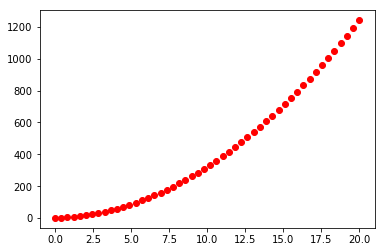

In [71]:
x = np.linspace(0, 20, num=50)  # num を増やすほど正確に関数を表現できる
plt.plot(x, f(x), "ro")

## 配列の情報を取得する

### 配列そのものの情報を得る

こちらもこれまでの例で利用してきたものですが、配列の情報を配列自身から取得可能です。

In [72]:
array = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [6, 7, 8, 9, 10]])
array

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [ 6,  7,  8,  9, 10]])

In [73]:
array.size

15

In [74]:
array.shape

(3, 5)

In [75]:
array.ndim

2

### 位置・範囲を指定して配列から値を抽出

Python のリストと似た作法で、配列中の位置・範囲を指定して値を抽出可能です。  
別資料を参照しつつ、どのような指定ができるか、確認してみてください。

In [76]:
square = np.arange(36).reshape((6, 6))
square

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11],
       [12, 13, 14, 15, 16, 17],
       [18, 19, 20, 21, 22, 23],
       [24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35]])

In [ ]:
square[1, 1:3]

In [77]:
square[:2, -2:]

array([[ 4,  5],
       [10, 11]])

In [78]:
square[3:, 1:4:2]

array([[19, 21],
       [25, 27],
       [31, 33]])

In [79]:
square[3:, [1, 3]]

array([[19, 21],
       [25, 27],
       [31, 33]])

#### 【問題】

上記の配列 `square` から、0 を含む 3 の倍数の数値を、位置・範囲指定で抽出してください。

In [80]:
square[:, ::3]

array([[ 0,  3],
       [ 6,  9],
       [12, 15],
       [18, 21],
       [24, 27],
       [30, 33]])

### 抽出条件を指定して配列から値を抽出

値の大小や一致などの条件を指定し、条件に合致した値を抽出することもできます。  
少し分かりにくい部分があるため、実際の動きを見ながら、その方法を理解しておきましょう。

なお、この作法は、表形式データを扱える `pandas` モジュールでも同様です。

In [81]:
array = np.arange(10)
array

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

まず、条件の指定です。「5より大きい」という条件にします。

In [82]:
array > 5

array([False, False, False, False, False, False,  True,  True,  True,  True], dtype=bool)

`True / False` の値の配列となりました。これを、元の配列と組み合わせます。

In [83]:
array[array > 5]

array([6, 7, 8, 9])

結果、条件に合致し `True` となった部分の値だけが残ります。

#### 【問題】

先ほどの `square` 配列で、0 を含む 3 の倍数の数値を、条件指定により抽出してください。  
位置指定の場合と、何か結果に違いがあるでしょうか。  

ヒント：割り算は `/` だが、割った後の余りの値を求めるには `%` 演算子を使う

In [84]:
square = np.arange(27).reshape((3, 3, 3))
square.shape

(3, 3, 3)

## 配列を使う基礎的な処理・演算

### 四則演算を実行する

ここまでの内容でも、四則演算を自然と利用してきました。  
配列に対して、単一の値を足し引きしたりすると、全ての要素に同じ処理が適用されます。  
元の配列は上書きされません。

In [ ]:
square + 6

同じ形状の配列を用意し、それらを足し引きすると、要素同士で加減乗除できます。

In [85]:
a = np.random.rand(5)
b = np.random.rand(5)
print(a)
print(b)

[ 0.14017141  0.04206858  0.72799627  0.61560551  0.9027321 ]
[ 0.62263341  0.2601217   0.55551768  0.40498648  0.14175587]


In [86]:
a / b

array([ 0.2251267 ,  0.16172653,  1.31048264,  1.52006434,  6.36821666])

### 基本統計量を計算する

簡単な統計値は、numpy でもすぐに計算することができます。

#### 最大・最小値

配列内の最大値、最小値を求めます。  
2次元以上の配列の場合、axis を指定することで、候補の値を走査する方向を指定できます。

In [87]:
random_values = np.random.randint(800, size=20)
random_values

array([424, 180, 681, 236,  67, 153, 158, 258, 591, 165, 474, 630, 608,
       671, 433, 238, 229, 362, 596, 594])

In [88]:
print(random_values.max())
print(random_values.min())

681
67


In [89]:
random_values_2d = random_values.reshape((4, 5))
random_values_2d

array([[424, 180, 681, 236,  67],
       [153, 158, 258, 591, 165],
       [474, 630, 608, 671, 433],
       [238, 229, 362, 596, 594]])

In [90]:
print(random_values_2d.max(axis=1))

[681 591 671 596]


In [91]:
print(random_values_2d.min(axis=0))

[153 158 258 236  67]


#### 総和

配列内の値の合計を求めます。`min / max` と同様、`axis` 指定が可能です。  
以降、同様に `axis` を指定できます。

In [92]:
random_values.sum()

7748

#### 平均値

配列内の値の平均を求めます。

In [93]:
random_values.mean()

387.39999999999998

#### 標準偏差

配列内の値から標準偏差を求めます。  
詳細は今回は割愛しますが、`ddof=0` / `ddof=1` 引数の指定により、標準偏差の分母 N / N-1 を制御できます。

In [94]:
random_values.std()

200.39221541766534

#### 分散

配列内の値から分散を求めます。`ddof` の引数指定が可能です。

In [95]:
random_values.var()

40157.039999999994

#### 中央値

配列内の値の中央値を求めます。  
配列内の値の数が偶数の場合、中央の2つの値の平均をとり、それを中央値として返します。

In [96]:
np.median(random_values)

393.0

#### 百分位数

百分位数で指定された位置の値を返します。  
50 を指定すると、中央値と同じ意味になります。  
返される値は、デフォルトでは補間された値となり、必ずしも要素として実在する値にはなりません。  
常に実在する値を返して欲しい場合は、`interpolation` 引数に、  
`nearest` や `lower`、 `higher` といったキーワードを渡します。

In [ ]:
np.sort(random_values)

In [ ]:
np.percentile(random_values, 80, interpolation="higher")

In [ ]:
img.T[0,:,:].mean()

### 行列積の計算

ここまでは、ごく基本的な算数・数学の処理を取り上げてきました。  
ここで、統計や機械学習で頻繁に用いられる行列積を `numpy` で取り扱います。  

#### なぜ行列積が「よく使われている」のか？

例えば、線形回帰による値の予測モデルを作ったとします。  
その予測のモデルが、次の式で表現される結果となりました。

$$ y= 3x_1 + 4x_2 $$

$x_1$ や $x_2$ は、何らかの特徴パラメータの値と考えてください。  
（例えば住宅価格予想なら、「広さ」や「駅からの距離」といった、物件ごとの情報です）

ここで、以下のような新しい $(x_1, x_2)$ のデータが得られたため、それぞれの予測結果を取得したいところです。

|レコード| $x_1$ | $x_2$ | $y$ |
|-------|-------|-------|--|
|#0|2|3| |
|#1|4|6| |
|#2|9|0| |
|#3|1|4| |
|#4|4|12| |
|#5|9|17| |
|#..|:|:| | |

この時、どのような処理が必要になるでしょうか？

$3 \times 2$ + $4 \times 3 = 18$ 
という処理を、1行ずつ処理することもできますが、それではデータ数が増えると処理の効率が下がります。  
以下のような処理をまとめておこない、一括で予測結果を得たいのです。

- $3 \times 2$ + $4 \times 3$
- $3 \times 4$ + $4 \times 6$
- $3 \times 9$ + $4 \times 0$
- ...

ここで登場するのが、行列積の概念です。  
行列積は、2つの行列について、まさにこれに相当する処理をおこなってくれます。  

$$
\begin{bmatrix}
        2 & 3  \\
        4 & 6  \\
        9 & 0  \\
        1 & 4  \\        
        4 & 12 \\        
        9 & 17 \\        
\end{bmatrix} \cdot \begin{bmatrix}
        3 \\
        4 \\
\end{bmatrix}
$$

実際に結果を確認してみましょう。

In [97]:
x = np.array([[2, 3], [4, 6], [9, 0], [1, 4], [4, 12], [9, 17]])
x

array([[ 2,  3],
       [ 4,  6],
       [ 9,  0],
       [ 1,  4],
       [ 4, 12],
       [ 9, 17]])

In [98]:
w = np.array([[3], [4]])
w

array([[3],
       [4]])

In [99]:
np.dot(x, w)

array([[18],
       [36],
       [27],
       [19],
       [60],
       [95]])

予想だけでなく、機械学習の学習処理などでも、これと同等の処理が内部でおこなわれることがあります。  

パラメータ情報の配列と、係数＝重みの情報の配列が個別に管理されている時に、  
それを利用して各パラメータ $\times$ 重み の和を得る。  
この処理をより効率的に進めるために行列積が利用されていることを、覚えておきましょう。  
今後線形回帰などの処理を理解していく上で、役立ちます。

#### 【問題】

先ほどのモデル式が更新され、$ y= 3x_1 + 4x_2 + 2 $ となりました。  
同じ $x_1$, $x_2$ の情報を用い、再度行列積で $y$ を求めてください。  
ただし、以前に求めた結果に 2 を足す処理をせず、以下の `w_` を使って、行列積を利用して値を求めてください。

In [100]:
w_ = np.array([[3], [4], [2]])
w_

array([[3],
       [4],
       [2]])

### その他の基本的な演算・処理

全景項目より頻度は下がるかもしれませんが、一般的によく使われている関数をいくつか取り上げます。

#### 累積和

配列の要素の最初から現在位置までの値を、全て足し合わせます。  
一番最後の要素の値は、`array.sum()` の結果と一致するはずです。

In [101]:
some_array = np.arange(100)
some_array.cumsum()

array([   0,    1,    3,    6,   10,   15,   21,   28,   36,   45,   55,
         66,   78,   91,  105,  120,  136,  153,  171,  190,  210,  231,
        253,  276,  300,  325,  351,  378,  406,  435,  465,  496,  528,
        561,  595,  630,  666,  703,  741,  780,  820,  861,  903,  946,
        990, 1035, 1081, 1128, 1176, 1225, 1275, 1326, 1378, 1431, 1485,
       1540, 1596, 1653, 1711, 1770, 1830, 1891, 1953, 2016, 2080, 2145,
       2211, 2278, 2346, 2415, 2485, 2556, 2628, 2701, 2775, 2850, 2926,
       3003, 3081, 3160, 3240, 3321, 3403, 3486, 3570, 3655, 3741, 3828,
       3916, 4005, 4095, 4186, 4278, 4371, 4465, 4560, 4656, 4753, 4851,
       4950])

#### 絶対値

値の絶対値を得ます。

In [ ]:
neg_array = np.arange(-10, 10)
neg_array

In [ ]:
np.abs(neg_array)

#### 最大・最小値要素のインデックス番号

配列中の最大値・最小値のインデックス番号を、`argmax` / `argmin` でそれぞれ取得可能です。  
最大値・最小値そのものより、最大・最小値の存在する場所や、  
最大・最小値を保有する個所・レコードの他の情報に関心がある時に、利用します。  
2次元以上の配列なら、多くの場合 axis を指定することになります。

In [ ]:
random_array = np.random.rand(2, 5)
random_array

In [ ]:
random_array.argmax(axis=1)

In [ ]:
random_array.argmin(axis=0)

#### 値のソート

値をソートします。  
`np.sort` は配列のコピーを返しますが、`array.sort` は配列そのものを変更します。  
状況に応じて使い分けましょう。

In [ ]:
np.sort(random_array)

In [ ]:
random_array

In [ ]:
random_array.sort()
random_array

#### 条件に合致する要素のインデックス番号

条件に基づく値検索に相当することを実現できる点は、`array > 10` などの記述と同等ですが、  
`np.where` は、条件に合致する要素のインデックス番号を格納した配列を次元ごとに用意して返します。

In [ ]:
np.where(random_array > 0.5)

この結果は、インデックス番号を指定した配列の値抽出に利用することができます。  
すなわち、元の配列と組み合わせると、検索条件に合致する要素を抽出できます。

In [ ]:
random_array[np.where(random_array > 0.5)]

#### 配列の形状（シェイプ）変更

配列の再整形をおこなうための関数です。  
配列内の実際の要素数と指定形状で表現しうる要素数が食い違う場合、エラーとなりますので、注意してください。

In [ ]:
# np.arange との組み合わせは、よく使われる
np.reshape(np.arange(50), (5, 10))

#### 配列の 1次元化

配列を1次元の「フラットな」形状とします。  
例えば、先ほどの $y= ax + bx + ..$ の例では、結果の値が 2次元のデータとなりました。  
この状態だとデータとして扱いづらく、1次元化したい時があります。

この場合に、いくつか利用できる関数があります。

In [ ]:
some_array = np.random.rand(3, 5)
some_array

`array.flatten()` は、常に配列のコピーを返します。

In [102]:
arr = some_array.flatten()
arr[0] = 0.01
print(arr)
print(some_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


`array.ravel()` は、可能なら配列のコピーを避けます。  
よって、変数に `array.ravel()` を格納した時、その変数を編集すると、元の配列も変化します。

In [103]:
arr2 = some_array.ravel()
arr2[0] = 0.01
print(arr2)
print(some_array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74
 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99]


先ほど紹介した `reshape` も、1次元化の際に利用することが可能です。

In [ ]:
arr3 = some_array.reshape(-1)
arr3[1] = 0.01
print(arr3)
print(some_array)

#### 配列の結合

異なる配列を結合したいケースも、時折生じます。  
次元数を増やさず既存の axis を利用する場合は `np.concatenate` を使用します。

In [104]:
array_a = np.random.rand(2, 2)
array_b = np.random.rand(2, 2)
print(array_a)
print(array_b)

[[ 0.79898017  0.47107009]
 [ 0.97299206  0.90496988]]
[[ 0.81951336  0.24877865]
 [ 0.92689608  0.19418063]]


2次元配列を縦に並べる場合は、axis=0 を指定し、

In [105]:
np.concatenate((array_a, array_b), axis=0)

array([[ 0.79898017,  0.47107009],
       [ 0.97299206,  0.90496988],
       [ 0.81951336,  0.24877865],
       [ 0.92689608,  0.19418063]])

2次元配列を横に並べる場合は、`axis=1` を指定します。

In [106]:
np.concatenate((array_a, array_b), axis=1)

array([[ 0.79898017,  0.47107009,  0.81951336,  0.24877865],
       [ 0.97299206,  0.90496988,  0.92689608,  0.19418063]])

np.stack を使うと、配列を新しい次元の方向に積み上げます。

In [ ]:
# 3次元の配列とし、データを積み上げる
np.stack((array_a, array_b))

### データの保存・読み込み

numpy の配列データをファイルに保存したりファイルから読み込んだりする時は、`np.save` や `np.load` を使います。

In [ ]:
array = np.random.rand(20, 5)
array

In [ ]:
np.save("array.npy", array)

これで、コンピュータ内にファイルとして `array.npy` が生成されたはずです。  
実際にコンピュータ内にファイルがあることを確認してみてください。

ファイルが存在することを確認できたら、配列を別の変数で読み込み、内容を確認してみます。

In [ ]:
loaded_array = np.load("array.npy")
loaded_array

## さらなる Numpy の探求

ここまで、numpy の最も基本的な機能の確認をしてきました。  
これらの内容を運用できるだけでも、基本的なデータ分析なら可能です。  
しかし、numpy の機能の幅は広く膨大であり、ここで紹介したものは氷山の一角に過ぎません。  

さらなる情報を求める場合は、公式の[リファレンス](https://docs.scipy.org/doc/numpy/reference/)のほか、
[Scipy Lecture Notes](http://www.scipy-lectures.org/intro/numpy/index.html) の Numpy 解説の項が参考になります。